# HW1: Get to know the data
HW1 introduces you the Fashion Mnist dataset with some useful preprocessing and visualization methods, and covers K-Means clustering for this dataset.

In [2]:
import os
import sys
sys.path.append("../../homework")
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

## Fashion Mnist 
Read [here](https://github.com/zalandoresearch/fashion-mnist) to learn more about the Fashion Mnist  dataset. 

In [3]:
# Load the Fashion Mnist  data
import mnist_reader
trainX, trainy = mnist_reader.load_mnist('../data/', kind='train')
testX, testy = mnist_reader.load_mnist('../data/', kind='t10k')


In [4]:
# Print some statistics about the data
print("train image data shape:", trainX.shape)
print("train label data shape:", trainy.shape)
print("test image data shape:", testX.shape)
print("test label data shape:", testy.shape)

train image data shape: (60000, 784)
train label data shape: (60000,)
test image data shape: (10000, 784)
test label data shape: (10000,)


## 1. Visualize the flattened data (20 Points)
The 28x28 Fashion Mnist images have been flattened as 784 x 1 image vectors.

Flattening the data will lead to some loss of information (such as spatial correlation between pixels) but it is nevertheless useful for training some linear classifiers.

Write some code below to visualize the training “flattened” data. Please provide a brief analysis about the characteristics of flattened data from visualization.

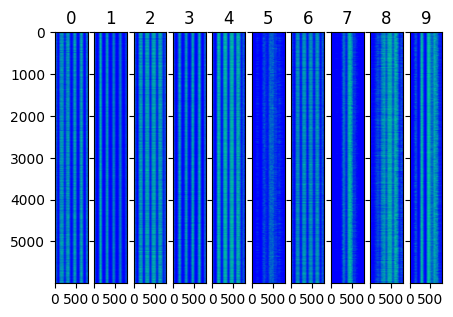

In [5]:
######################################################################
# TODO:                                                              #
# Visualize the data to analyze the characteristics of flattened data#
######################################################################
# your code
######################################################################
CLASS_NUM = 10

# plot all the flattened training data according to different classes
fig, axs = plt.subplots(1,CLASS_NUM, sharey=True, figsize=(5,5), dpi=100)
for class_idx in range(0, CLASS_NUM):
    axs[class_idx].imshow(trainX[trainy == class_idx], cmap='winter')
    axs[class_idx].set_title(class_idx)
######################################################################
#                       END OF YOUR CODE                             #
######################################################################

As the figure shown above, the y axis is sample index of the corresponding class and the x axis(below) are the pixel values from 0 to 784 for each image.
Therefore, we can easily observe that **The distribution of the pixel values are very similar in the same class**.

## 2. Visualize the 2D averaged data  (20 Points)
Please write some code to reshape the training flattened data back to 2D 28x28 images and plot every "average" images of classes 0-9. Please provide a brief analysis about the difference between the 2D images and flattened data of Fashion Mnist from visualization.

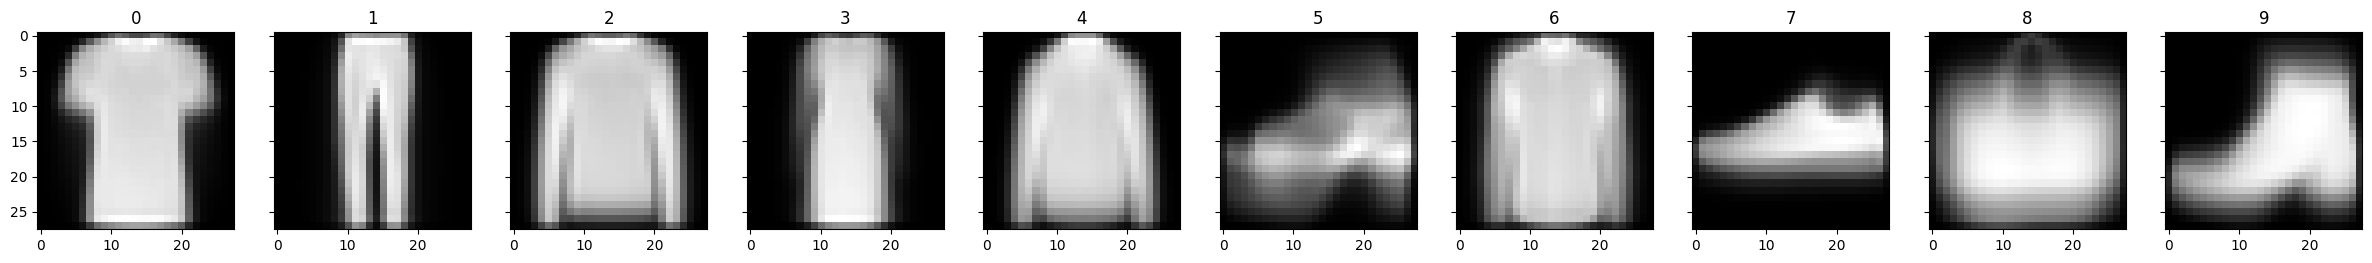

In [6]:
#####################################################################
# TODO:                                                             #
# Plot each "average image" of classes 0-9                          #
#####################################################################
# your code
fig, axs = plt.subplots(1,CLASS_NUM, sharey=True, figsize=(30,5), dpi=100)
for class_idx in range(0, CLASS_NUM):
    axs[class_idx].imshow(np.mean(trainX[trainy == class_idx], axis=0).reshape(28, 28), cmap='gray')
    axs[class_idx].set_title(class_idx)


#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################

The 2D averaged images are more intuitive than the flattened images.  The color of the flattened image tends to be darker if the black is much in the 2D image such as the class 5.

## 3. Conduct PCA analysis for the flattened data (20 Points)
Please write some code to conduct the Principle Component Analysis (PCA) analysis for the training flattened data, and plot the <font color=black>**first 100 points of**</font> the first principle component against the second principle component. Note: please plot the components in different colors according to their classes. The coordinate of each point is (first_principle_component, second_principle_component).

From the visualization, please give a brief discussion on whether the first principle component and second principle component is sufficient to classify the 10 classes of flattened data?

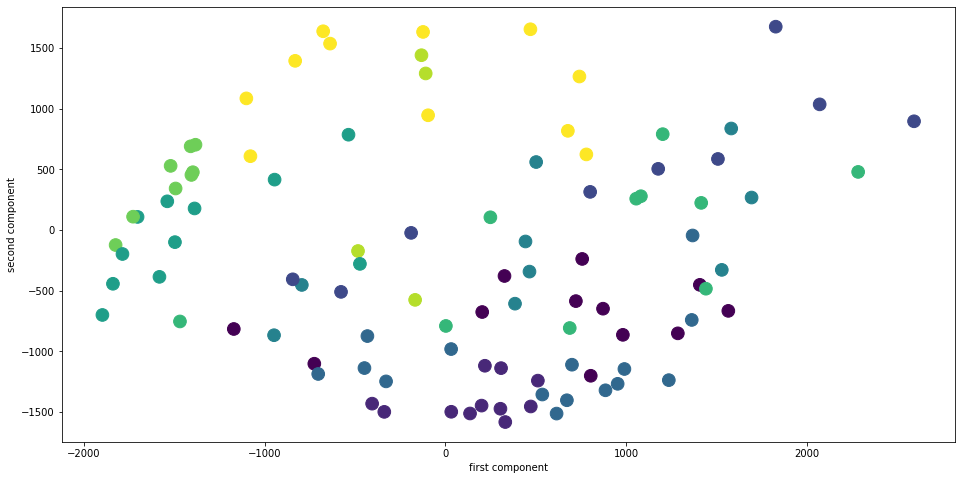

In [37]:
#####################################################################
# TODO:                                                             #
# PCA analysis for the 2D flattened data  
# Hint: from sklearn.decomposition import PCA
#       use PCA(svd_solver='auto').fit_transform(trainX) 
#       to compute the PCA of trainX                                #
#####################################################################
# your code starts here
from sklearn.decomposition import PCA

pca_trainX = PCA(svd_solver='auto').fit_transform(trainX)

plt.figure(figsize=(16, 8))
plt.scatter(pca_trainX[0:100, 0:1], pca_trainX[0:100, 1:2], c=trainy[0:100], s=160, marker='o')
plt.xlabel(f'first component')
plt.ylabel(f'second component')
plt.show() 
#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################


Although different classes take up different areas in the 2D area, the points assigned to different classes still can not be seperated very well. so only two features may not be that sufficient for the classification

## 4. Implement K-Means clustering to cluster the first and second principle component (PC) of training flattened data (40 Points)

Please write some code to implement the K-Means clustering for the <font color=black>**first 100 points of**</font> first and second principle component (PC) of training flattened data obtained from step 3. Please briefly discuss about the clustering results.

For each of the 100 nodes, its coordinate is (firstPC, secondPC).

In [19]:
k = 10 # set k=10 for 10 classes in Fashion Mnist dataset

### 4.1 Initialization of Centroids (5 Points)

In this step, please randomly pick *k=10* centroids from the 100 1st-2nd PC pairs as centroids initialization.

The method `init_centroids()` should return a list of *k=10* different data points. Example format for 2d data points and *k=10*:

`centroids = [ [0, 0 ], [1, 1 ], [ 2, 2 ], ... ]`

In [25]:
def init_centroids(X, k):
    centroids = None
    
    ### Your code starts here ###############################################################
    random_idx = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[random_idx, :]
    print(f'centroids shape: {centroids.shape}')
    ### Your code ends here #################################################################
    
    return centroids


#
# Example format:
#
# centroids = [ [0, 0 ], [1, 1 ], [ 2, 2 ], ... ]
#
X_kmeans = pca_trainX[:100,:2]  # pca_trainX should be your computed PCA result
centroids = init_centroids(X_kmeans, k)

centroids shape: (10, 2)


### 4.2 Cluster Assignment  (10 Points)

In this step, each data point is assigned to its nearest centroid. Hint: you may want to check [`numpy.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) and [`numpy.argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) for calculating distances and finding the smallest values.

The method `assign_clusters()` should return a dictionary where the keys represent the ids of the *k* cluster ranging from *0* to *k-1*, and each value is a list of indices of the data points belonging to the respective cluster. For example,

`
clusters = {
   0: [57, 32, 0, 99],
   1: [5, 46, 72],
   2: [92, 15, 26, 97, 30],
   ...
}
`

In [28]:
def assign_clusters(X, k, centroids):
    # Reset all clusters
    clusters = {key: [] for key in range(k)}

    for idx, x in enumerate(X):
        ### Your code starts here ###############################################################
        # get the distance of each centroid and find the nearest one
        distances = np.linalg.norm(centroids - x, axis=1)
        assert (len(distances) == k)
        clusters[np.argmin(distances)].append(idx)
        ### Your code ends here #################################################################
    return clusters

#
# Example format
#
#clusters = {
#   0: [2, 4, 6, 8],
#   1: [0, 1, 5],
#   2: [3, 7, 9]
#}
clusters = assign_clusters(X_kmeans, k, centroids)

### 4.3 Update of Centroids (5 Points)

In this step, please update all centroids based on the assgnment of data points. The updated centroids should be the average of its assigned data points.

The method `update_centroids()` should return a list of the same format as the method `init_centroids()`; see above.

In [30]:
def update_centroids(X, clusters, centroids):
    
    new_centroids = np.zeros_like(centroids)

    ### Your code starts here ###############################################################
    for cluster_idx in range(0, centroids.shape[0]):
        cluster_vals = clusters[cluster_idx]

        new_centroid = np.mean(X[cluster_vals, :], axis=0)

        new_centroids[cluster_idx] = new_centroid
    ### Your code ends here #################################################################
    return new_centroids


#
centroids = update_centroids(X_kmeans, clusters, centroids)

### 4.4 Implement K-Means clustering using above functions (15 Points)

In this step, please combine the above three steps into a single function to perform the K-Means clustering for the <font color=black>**first 100 of**</font> first and second principle component (PC) of training flattened data obtained from step 3. Note: Don't forget to stop once you find all clusters.

The method `kmeans` should return a clustering (same format as `assign_clusters()` and `update_centroids`), as well as the list of centroids after convergence (same format as `init_centroids()`).

In [33]:
def kmeans(X, k, max_iter=100, verbose=True):
    clusters, num_iterations = {}, 0
    
    centroids = init_centroids(X, k)

    for _ in range(max_iter):
        # Update the counter (+1 since we start from 0)
        num_iterations = num_iterations + 1
        
        ### Your code starts here ###############################################################
        prev_centroids = centroids.copy()

        clusters = assign_clusters(X, k, centroids)
        centroids = update_centroids(X, clusters, centroids)

        if np.all(prev_centroids == centroids):
            break
        ### Your code ends here #################################################################
    
    # Let's print the number of comparison
    if verbose is True:
        print('K-Means required {} iterations to converge.'.format(num_iterations))
    
    return clusters, centroids


### 4.5 Test your Implementation (5 Points)

Run your implementation of K-Means for the <font color=black>**first 100 points of**</font> first and second principle component (PC) of training flattened data obtained from step 3, and visualize the results using the `plot_clusters` method we provide for you.

From the visualization, please briefly discuss about the clustering results.

centroids shape: (10, 2)
K-Means required 5 iterations to converge.


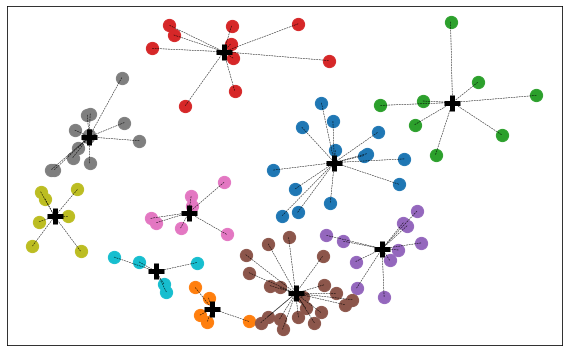

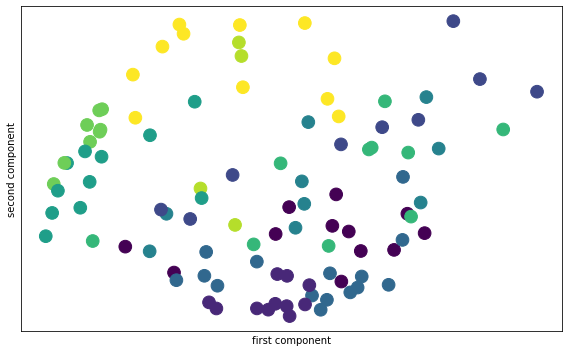

In [44]:
clusters, centroids = kmeans(X_kmeans, k)

mnist_reader.plot_clusters(X_kmeans, clusters, centroids)

# original 100 points
plt.figure(figsize=(8, 5))
plt.scatter(pca_trainX[0:100, 0:1], pca_trainX[0:100, 1:2], c=trainy[0:100], s=160, marker='o')
plt.xlabel(f'first component')
plt.ylabel(f'second component')
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
plt.tight_layout()
plt.show()

Compared to the original distribution of true classes, the k-mean clustering can group some of the points which assigned to the same class, but some points of different classes may also be included, because the points will only be assigned to the nearest centroid, in other words, **the classificiation accuracy of k-mean is depend upon the original distribution of the data.**

In your submission, in addition to the completed codes and the resulting images for the visualizations, also provide brief responses to the above questions and a brief analysis of the visualized data. 

You may refer to [here](http://colah.github.io/posts/2014-10-Visualizing-MNIST/) for more interesting and beautiful visualisations. Of course, the methods employed are more complex.